In [2]:
import os
import matplotlib.pyplot as plt

def count_class_distribution(base_dir):
    """
    Counts the number of 'good' and 'bad' WAV files per client directory.

    Expects each client to have:
        client_x/
            ├── good/
            └── bad/

    Args:
        base_dir (str): Path to the federated directory containing client folders.

    Returns:
        dict: {client_name: {'good': int, 'bad': int}}
    """
    stats = {}
    for client in sorted(os.listdir(base_dir)):
        client_path = os.path.join(base_dir, client)
        if not os.path.isdir(client_path):
            continue

        good_path = os.path.join(client_path, "good")
        bad_path = os.path.join(client_path, "bad")

        good_count = len([
            f for f in os.listdir(good_path) if f.endswith(".wav")
        ]) if os.path.exists(good_path) else 0

        bad_count = len([
            f for f in os.listdir(bad_path) if f.endswith(".wav")
        ]) if os.path.exists(bad_path) else 0

        stats[client] = {'good': good_count, 'bad': bad_count}
    return stats


def plot_class_ratios(stats, title="Class Distribution Across Clients"):
    """
    Plots a stacked bar chart showing good/bad file counts per client.

    Args:
        stats (dict): {client_name: {'good': int, 'bad': int}}
        title (str): Title for the plot
    """
    clients = list(stats.keys())
    good_counts = [stats[c]['good'] for c in clients]
    bad_counts = [stats[c]['bad'] for c in clients]

    x = range(len(clients))
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x, good_counts, label='Good', color='green')
    ax.bar(x, bad_counts, bottom=good_counts, label='Bad', color='red')

    ax.set_xticks(x)
    ax.set_xticklabels(clients, rotation=45)
    ax.set_ylabel("Number of Audio Files")
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()


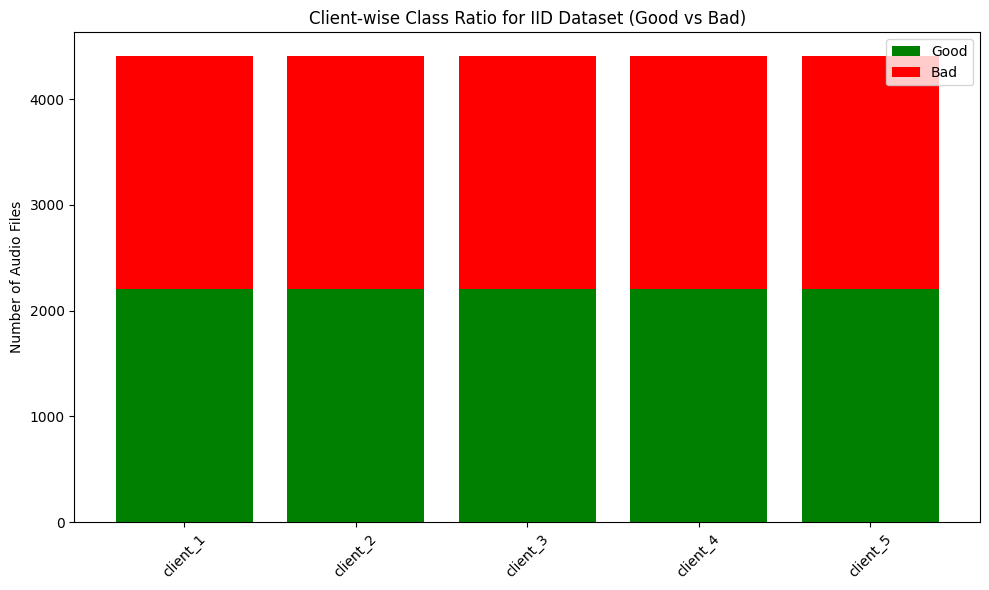

In [5]:
# 🧪 Run check for correct folder layout
base_dir = "resources/material/train-data/federated/IID"
stats = count_class_distribution(base_dir)
plot_class_ratios(stats, title="Client-wise Class Ratio for IID Dataset (Good vs Bad)")

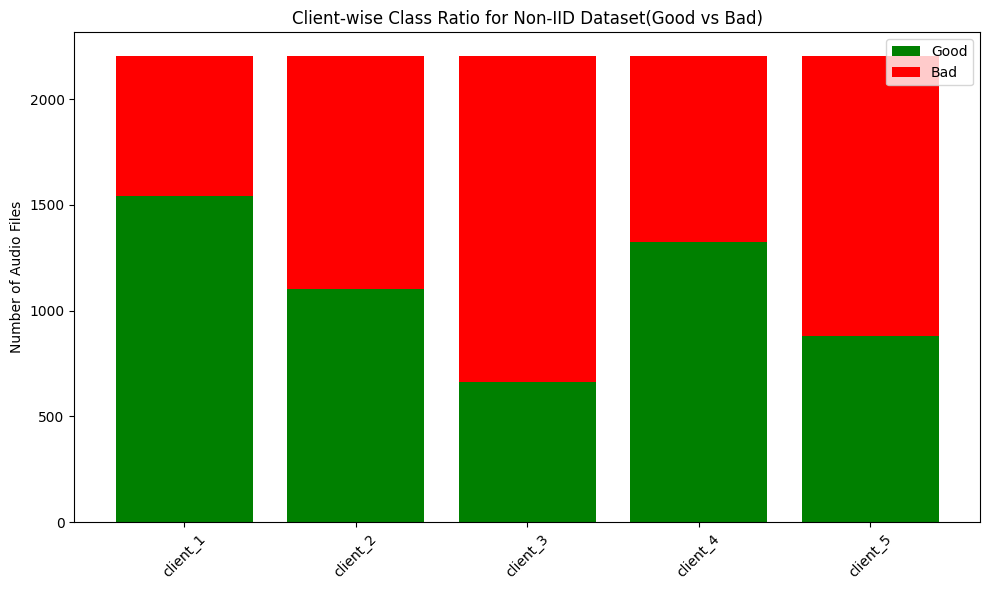

In [6]:
# 🧪 Run check for correct folder layout
base_dir = "resources/material/train-data/federated/non-IID"
stats = count_class_distribution(base_dir)
plot_class_ratios(stats, title="Client-wise Class Ratio for Non-IID Dataset(Good vs Bad)")